# Preprocessing Phase #1 -  Split and Save training and test data to a directory

### CTCB (Classification of Toxigenic CyanoBacterial genera) project

* **Author : Iman Kianian**
* **Paper Link : **

---------------

#### Import the necessary libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections
from PIL import Image
import uuid

In [2]:
def expand2square(pil_img, background_color,target_size=150):
    """
        this function convert a image to its square size of size = target_size
        
        pil_img (nd.array): an 2d numpy array (an image)
        background_color (tuple): a tuple of 3 components for (R,G,B) channels
        target_size (int): result image will be of size target_size x target_size
    """
    pil_img = Image.fromarray(pil_img)
    width, height = pil_img.size
    if width == height and width == target_size:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        height = width
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        width = height
        
    if width>target_size:
        dim = (target_size,target_size)
        resized = cv2.resize(np.array(result), dim, interpolation = cv2.INTER_AREA)
        return resized
    elif width<target_size:
        resized = Image.new(result.mode, (target_size, target_size), background_color)
        resized.paste(result, ((target_size - width) // 2, (target_size - height) // 2))
        return resized
    else:
        return result
        

In [3]:
def calculatebackground(img):
    """
        this function estimates the background color of an image.
        
        img (nd.array): an 2d numpy array (an image)
    """
    args_r = (img[:,0][:,0] ,img[:,-1][:,0],img[0,:][:,0] , img[-1,:][:,0] ) # collecting R channel of all surrounding pixels of the image
    args_g = (img[:,0][:,1] ,img[:,-1][:,1],img[0,:][:,1] , img[-1,:][:,1] ) # collecting G channel of all surrounding pixels of the image
    args_b = (img[:,0][:,2] ,img[:,-1][:,2],img[0,:][:,2] , img[-1,:][:,2] ) # collecting B channel of all surrounding pixels of the image
    
    args_r = np.concatenate(args_r)
    args_g = np.concatenate(args_g)
    args_b = np.concatenate(args_b)

    r = np.mean(args_r,axis=None)  # calculating mean on all R channels of all surrounding pixels of the image
    g = np.mean(args_g,axis=None)  # calculating mean on all G channels of all surrounding pixels of the image
    b = np.mean(args_b,axis=None)  # calculating mean on all B channels of all surrounding pixels of the image
    return int(np.round(r)),int(np.round(g)),int(np.round(b))

-----------------

# Load Dataset

In [4]:
Categories = list(os.listdir("G:\CAI\cyanobacteria paper work\scrap_data\dd"))
Categories

['Raphidiopsis_ss']

In [5]:
print(f'There are {len(Categories)} categories of oxigenic cyanobacterial genera.')

There are 1 categories of oxigenic cyanobacterial genera.


In [6]:
images = {}
images_directory = {}
for cls in Categories:
    directory = "G:\CAI\cyanobacteria paper work\scrap_data\dd/"+cls
    if os.path.isdir(directory):
        imags = []
        imgs_directory = []
        for i, filename in enumerate(os.listdir(directory)):
            image_format = filename.split('.')[-1]  # get image format (eg. png or jpg, etc.)
            if image_format in ('jpg','png'):
                addr = directory+"/"+filename
                image = cv2.imread(addr)
                imags.append(image)
                imgs_directory.append(addr)
        images[cls] = imags
        images_directory[cls] = imgs_directory

In [7]:
countofallimages = 0
for cls in Categories:
  print(f'Number of Images in {cls} class is = {len(images[cls])}')
  countofallimages += len(images[cls])

Number of Images in Raphidiopsis_ss class is = 9


These numbers are total number of samples we have from each class.

In [8]:
print(f'Count of all images in Dataset = {countofallimages}')
print(f'There are {len(Categories )} classes')
print(f'Average number of essential images for each class is = {round(countofallimages/len(Categories))}')

Count of all images in Dataset = 9
There are 1 classes
Average number of essential images for each class is = 9


In [9]:
import numpy as np
import cv2  # Assuming you're using OpenCV for image processing

# Define the desired shape for all images (e.g., 224x224)
desired_shape = (150, 150)

X = []   # X stores images of dataset
y = []   # y stores labels of each image 
X_addr = []  # X_addr stores path of each image

for cls in Categories:
    for img in images[cls]:
        resized_img = cv2.resize(img, desired_shape)  # Resize image to desired shape
        X.append(resized_img)
        y.append(cls)

for cls in Categories:
    for img in images_directory[cls]:
        X_addr.append(img)

y = np.array(y)
X = np.array(X)  # Now all images should have the same shape
X_addr = np.array(X_addr)


In [10]:
counter = collections.Counter(y)
counter

Counter({'Raphidiopsis_ss': 9})

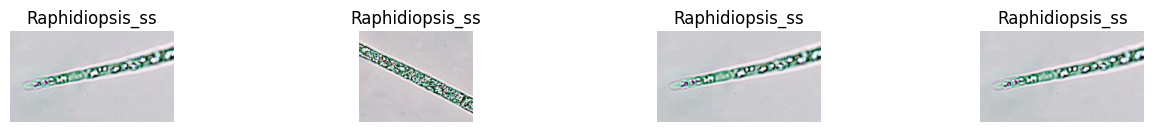

In [11]:
for cls in Categories:
  plt.figure(figsize=(16,4))
  for n , i in enumerate(list(np.random.randint(0,counter[cls],4))) : 
    plt.subplot(3,4,n+1)
    plt.imshow(images[cls][i],cmap="gray")   
    plt.axis('off')
    plt.title(cls)

#### Splitting Train and Test dataset

In [12]:
X_train_ind, X_test_ind, y_train, y_test = train_test_split(list(range(y.shape[0])), y, test_size=0.2,random_state=1)
X_train_addr = X_addr[X_train_ind]
X_train = X[X_train_ind]

X_test_addr = X_addr[X_test_ind]
X_test = X[X_test_ind]

In [13]:
collections.Counter(y_train)

Counter({'Raphidiopsis_ss': 7})

above numbers are the numbers that placed in ***training dataset***.

In [14]:
collections.Counter(y_test)

Counter({'Raphidiopsis_ss': 2})

above numbers are the numbers that placed in ***test dataset***.

In [15]:
# for i , img in enumerate(X_train):
#     try:
#         os.mkdir(f'../Train/{y_train[i]}')
#     except:
#         pass
#     address = f'../Train/{y_train[i]}/{X_train_addr[i][17:].split("/")[1]}'
#     cv2.imwrite(address, np.array(new_X))

-----------

#### Save splitted dataset to directory

In [16]:
for i, img in enumerate(X_train):
    # Construct the directory path for the current class
    class_dir = f'Train/{y_train[i]}'
    
    # Create the directory for the current label if it doesn't exist
    os.makedirs(class_dir, exist_ok=True)

    # Extract the base filename from the original address
    filename = os.path.basename(X_train_addr[i])  # Extracts 'image_001.jpg'
    
    # Construct the complete address for saving the image
    address = os.path.join(class_dir, filename)
    
    # Process the image
    new_X = expand2square(img, calculatebackground(img))
    
    # Convert the processed image to a NumPy array
    image_array = np.array(new_X)
    
    # Save the image using OpenCV
    if cv2.imwrite(address, image_array):
        print(f"Saved: {address}")
    else:
        print(f"Failed to save: {address}")

Saved: Train/Raphidiopsis_ss\Screenshot 2024-08-13 103330.png
Saved: Train/Raphidiopsis_ss\Screenshot 2024-08-13 103335.png
Saved: Train/Raphidiopsis_ss\Screenshot 2024-08-13 103246.png
Saved: Train/Raphidiopsis_ss\Screenshot 2024-08-13 103236.png
Saved: Train/Raphidiopsis_ss\Screenshot 2024-08-13 103310.png
Saved: Train/Raphidiopsis_ss\Screenshot 2024-08-13 103302.png
Saved: Train/Raphidiopsis_ss\Screenshot 2024-08-13 103321.png


In [47]:
for i , img in enumerate(X_test):
    try:
        os.mkdir(f'../dataset/Test/{y_test[i]}')
    except:
        pass
    address = f'../dataset/Test/{y_test[i]}/{X_test_addr[i][17:].split("/")[1]}'
    cv2.imwrite(address, np.array(new_X))

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:708: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'


In [17]:
for i, img in enumerate(X_test):
    # Construct the directory path for the current class
    class_dir = f'Test/{y_train[i]}'
    
    # Create the directory for the current label if it doesn't exist
    os.makedirs(class_dir, exist_ok=True)

    # Extract the base filename from the original address
    filename = os.path.basename(X_train_addr[i])  # Extracts 'image_001.jpg'
    
    # Construct the complete address for saving the image
    address = os.path.join(class_dir, filename)
    
    # Process the image
    new_X = expand2square(img, calculatebackground(img))
    
    # Convert the processed image to a NumPy array
    image_array = np.array(new_X)
    
    # Save the image using OpenCV
    if cv2.imwrite(address, image_array):
        print(f"Saved: {address}")
    else:
        print(f"Failed to save: {address}")

Saved: Test/Raphidiopsis_ss\Screenshot 2024-08-13 103330.png
Saved: Test/Raphidiopsis_ss\Screenshot 2024-08-13 103335.png
